In [1]:
import numpy as np
import matplotlib.pyplot as plt
from configparser import ConfigParser
from CosmoUtils import *
import h5py


In [2]:
prefix='/home/dominique.aubert/dev-units/dyablo-units/run/stage/cosmo'

In [3]:
isnap=2850

In [4]:
nb_iter, zsnap = ["0002850",0.0]

filename = f"cosmo_particles_particles_iter{nb_iter}.h5"

fpart = h5py.File(f'datastageM2/{filename}', 'r')
print([key for key in fpart.keys()])
positions = np.array(fpart['coordinates'])
Npart=np.shape(positions)[0]
print(Npart)
if(np.max(positions)>10.0):
    positions = positions #/ (Lbox*3.085677e22)
print(np.max(positions))

['coordinates', 'mass', 'vx', 'vy', 'vz']
16777216
1.0


avg rho 4096.0
16777216.0


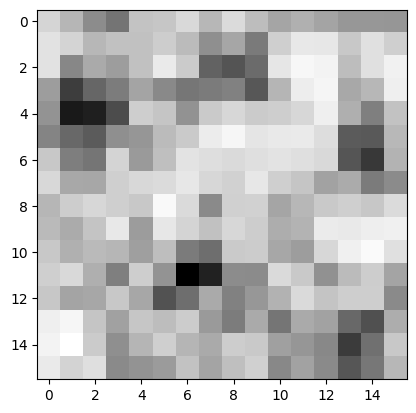

In [5]:
NC=16 # the grid sampling of the CIC density estimate
deltadm,_=part2cic(positions,NC) # returns the density contrast
plt.figure()
plt.imshow(np.log10(np.sum(deltadm+1,axis=2)),cmap='Greys')

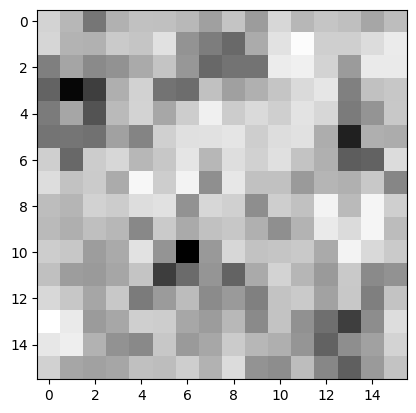

In [6]:
bin=np.linspace(0,1,NC+1)
dbis,bb=np.histogramdd(positions,bins=(bin,bin,bin))
deltadmbis=dbis/np.average(dbis)-1
plt.imshow(np.log10(np.sum(deltadmbis+1,axis=2)),cmap='Greys')

In [10]:
from tqdm import tqdm
dcube=np.zeros((NC,NC,NC))
dc=1./NC
for i in tqdm(range(NC)):
    imin=i*dc
    imax=(i+1)*dc
    for j in range(NC):
        jmin=j*dc
        jmax=(j+1)*dc
        for k in range(NC):
            kmin=k*dc
            kmax=(k+1)*dc
            w=np.where((positions[:,0]>=imin)*(positions[:,0]<imax)*(positions[:,1]>=jmin)*(positions[:,1]<jmax)*(positions[:,2]>=kmin)*(positions[:,2]<kmax))
            nc=np.size(w)
            # print(i,j,k,nc)

            dcube[i,j,k]=nc

print(np.sum(dcube))


 38%|███▊      | 6/16 [06:11<10:18, 61.89s/it]


KeyboardInterrupt: 

In [ ]:
deltadcube=dcube/np.average(dcube)-1.0

In [ ]:
bin=np.linspace(-1,3,num=128)
bcen=0.5*(bin[1:]+bin[:-1])
hcic,bcic=np.histogram(deltadm,bins=bin)
hngp,bngp=np.histogram(deltadmbis,bins=bin)
#hcube,bcube=np.histogram(deltadcube,bins=bin)


plt.figure()
plt.plot(bcen,hcic,label='cic')
plt.plot(bcen,hngp,label='ngp')
#plt.plot(bcen,hcube,'o',label='cubes')
#plt.yscale('log')
plt.legend()